
                                   
  *ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS*                                                                    *BRAINTELS LABS*
   =======

--------------------------------- Modulo Inception V1 ----------------------------
=========================================================

In [50]:
import tensorflow as tf
import numpy as np
import time
from IPython.display import Image

**Modulo Inception V1** :
Modulo que permite poder extraer distintas caracteristicas de un tensor con diferentes dimensiones . luego de extraer las caracteristicas se realiza un proceso de concatenación.
El modulo inception lo podemos encontrar en distintas versiones . En la arquitectura GoogleNet(2014) lo encontramos en etapas donde se requiere extraer diferentes caracteristicas de algun tensor mediante el uso de filtros de convolución de dimensiones 1x1 , 3x3 , 5x5 y Max Pooling 3x3 . El uso de kernel de tamaño 1x1 tiene como objetivo reducir las dimensiones de entrada de una forma no lineal y con ello reducir la carga computacional.
La concatenación tiene como objetivo agrupar las respuesta a cada kernel y agruparlos en un solo Tensor.  ** * ----- BRAINTELS LABS------ * **

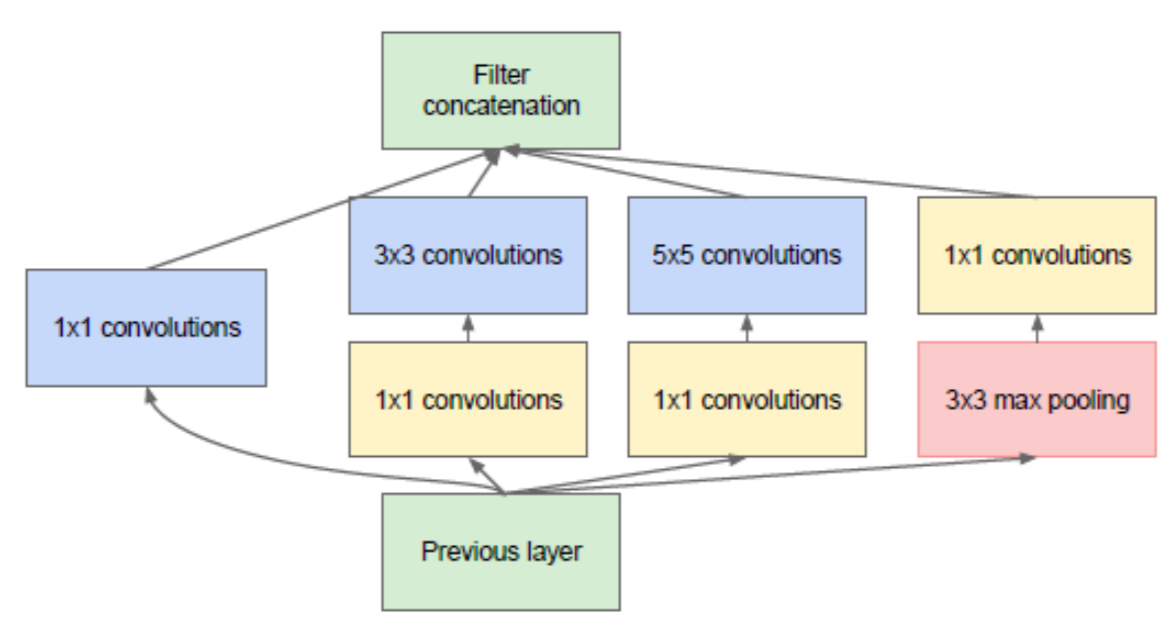

In [51]:
Image(filename='img1.png')

**Modulo Inception **

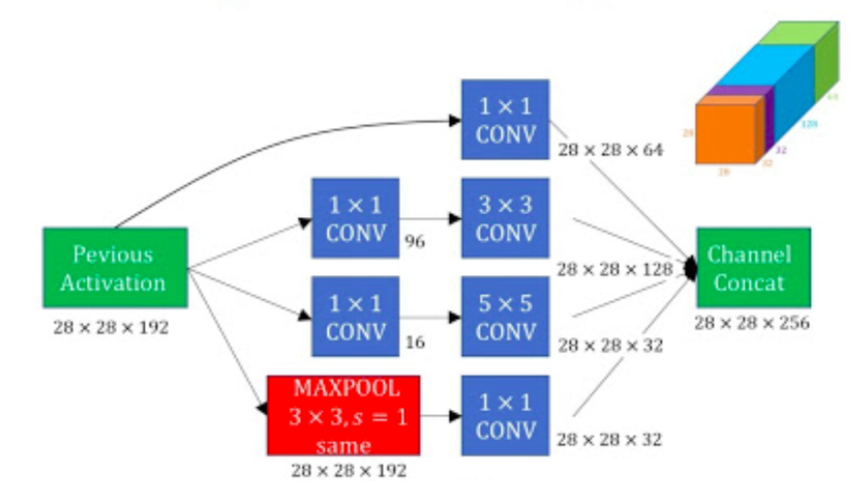

In [52]:
Image(filename="img2.png")

** * ----- Grafo Computacional del Modulo Inception V1------ * **         

In [53]:


#------------------------- Grafo computacional Inception V1 -------------------------
inception=tf.Graph()

with inception.as_default():
    
    #============== definir tensor de entrada ====== batch,filas,columnas,canales_in 1x28x28x192
    X=tf.random.uniform(shape=(1,28,28,192),minval=0.0 , maxval=1.0,name="INPUT")
    
    
    print("INPUT: DIMENSIONES =>",X.shape)
    print("=================:SALIDAS INTERMEDIAS:=================")
    #===============definir kernel 1x1z64============ filas,columnas,canales_in,canales_out 1x1x192x64
    ka11=tf.random.truncated_normal(shape=(1,1,192,64),mean=0.0,stddev=1.0)
    #=================definir kernel 1x1x96========= filas,columnas,canales_in,canales_out 1x1x192xz96
    kb11=tf.random.truncated_normal(shape=(1,1,192,96),mean=0.0,stddev=1.0)
    #=================definir kernel 1x1x16========= filas,columnas,canales_in,canales_out 1x1x192xz16
    kc11=tf.random.truncated_normal(shape=(1,1,192,16),mean=0.0,stddev=1.0)
    
    
    #==================Salida Y1 28x28x64 ============= batch,filas,columnas,canales_out 1z28z28z64
    Y1=tf.nn.conv2d(input=X,filters=ka11,padding="SAME",strides=1,name="Y1")
    print("Y1 DIMENSIONES: ",Y1.shape)
    #==================Salida Yb 28x28x96 ============= batch,filas,columnas,canales_out 1z28z28z96
    Yb=tf.nn.conv2d(input=X,filters=kb11,padding="SAME",strides=1,name="Yb")
    #================definir kernel 5x5x128 ===== filas,columnas,canales_in,canales_out 5x5x96x128
    kb55=tf.random.truncated_normal(shape=(5,5,96,128))
    #===================== Salida Y2 28x28x128 ========= batch,filas,columnas,canales_out 1x28x28x128
    Y2=tf.nn.conv2d(input=Yb,filters=kb55,padding='SAME',strides=1,name="Y2")
    print("Y2 DIMENSIONES: ",Y2.shape)

    
    #==================Salida Yb 28x28x16 ============= batch,filas,columnas,canales_out 1z28z28z16
    Yc=tf.nn.conv2d(input=X,filters=kc11,padding="SAME",strides=1,name="Yc")
    #================definir kernel 3x3x32 ===== filas,columnas,canales_in,canales_out 3x3x16x32
    kc33=tf.random.truncated_normal(shape=(3,3,16,32))
    #===================== Salida Y3 28x28x32 ========= batch,filas,columnas,canales_out 1x28x28x32
    Y3=tf.nn.conv2d(input=Yc,filters=kc33,padding='SAME',strides=1,name="Y3")
    print("Y3 DIMENSIONES: ",Y3.shape)
    
    
    #==================max pooling 2d  3x3 ================ batch,filas,columnas,canales_out 1 1x28x28x192
    Yd=tf.nn.max_pool2d(input=X,ksize=3,padding= "SAME",strides=1,name="Yd",data_format="NHWC")
     #=================definir kernel 1x1x32========= filas,columnas,canales_in,canales_out 1x1x192x32
    kd11=tf.random.truncated_normal(shape=(1,1,192,32),mean=0.0,stddev=1.0)
    #===================== Salida Y428x28x32 ========= batch,filas,columnas,canales_out 1x28x28x32
    Y4=tf.nn.conv2d(input=Yd,filters=kd11,padding='SAME',strides=1,name="Y4")
    print("Y4 DIMENSIONES: ",Y4.shape)
    print("=======================================================")
    
    
    
    #=================REALIZAR CONCATENACION ===============
    Y=tf.concat([Y1,Y2,Y3,Y3],axis=3,name="OUTPUT")
    print("OUTPUT: DIMENSIONES =>",Y.shape)
    
    
    
    

INPUT: DIMENSIONES => (1, 28, 28, 192)
=================:SALIDAS INTERMEDIAS:=================
Y1 DIMENSIONES:  (1, 28, 28, 64)
Y2 DIMENSIONES:  (1, 28, 28, 128)
Y3 DIMENSIONES:  (1, 28, 28, 32)
Y4 DIMENSIONES:  (1, 28, 28, 32)
OUTPUT: DIMENSIONES => (1, 28, 28, 256)


In [54]:
#----------Sesion Para ejecutar el Grafo computacional -----
with tf.compat.v1.Session(graph=inception) as braintels:
    t1=time.time()
    output=braintels.run(Y)
    t2=time.time()
    print('---------- Tiempo de calculo en ms :',1000*(t2-t1),'----------')
    

---------- Tiempo de calculo en ms : 34.715890884399414 ----------


** *-----BRAINTELS LABS-------* **
ARTIFICIAL INTELLIGENCE , IMAGE PROCESSING & EMBEDDED SYSTEMS